# Redshift Data of DESIJ1018-0121

Author: Anowar Shajib, S M Rafee Adnan

## Load data

In [1]:
!pip install astropy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.7/738.7 kB 35.4 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.io import fits
from astropy.wcs import WCS

In [3]:
data, header = fits.getdata(
    "/kaggle/input/fits-file/DESIJ1018-0121_F140W_drz_sci.fits", header=True
)

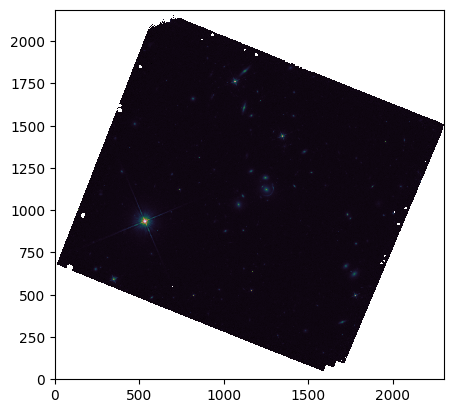

In [4]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

In [ ]:
# need to be changed for each cluster file
FILENAME = (
    "/kaggle/input/redshift-desij1018-0121-updated/redshift_DESIJ1018_0121_updated.csv"
)
data_legacy = pd.read_csv(FILENAME, delimiter=",")
data_legacy.head()

,_r,id,RAJ2000,DEJ2000,release,brickid,objid,type,pstar,gmmcomp,zphot,e_zphot,fclean,fqual
0,0.013521,8000323786000061,154.699172,-1.372270,8000,323786,61,PSF,0.999,P4,1.556,2.343,1,0
1,0.013458,8000323786000019,154.686738,-1.369088,8000,323786,19,REX,0.001,R4,0.434,0.079,1,1
2,0.011119,8000323786000108,154.699003,-1.369825,8000,323786,108,PSF,0.928,P2,0.770,0.196,1,0
3,0.011145,8000323786000109,154.700153,-1.369442,8000,323786,109,PSF,0.002,P6,0.455,0.206,1,1
4,0.009830,8000323786000110,154.697428,-1.368866,8000,323786,110,PSF,0.013,P6,0.338,0.188,1,1


In [6]:
%matplotlib widget
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

Canvas(toolbar=None)

In [7]:
# In degrees
center_x, center_y = 154.6958333, -1.3591667  # RA 10:18:47 DEC -01:21:33
radii = 50  # in arcsec
radii_deg = radii / 3600

x_upper, y_upper = center_x + radii_deg, center_y + radii_deg
x_lower, y_lower = center_x - radii_deg, center_y - radii_deg

x_limit_upper, y_limit_upper = wcs.all_world2pix(x_upper, y_upper, 0)
x_limit_lower, y_limit_lower = wcs.all_world2pix(x_lower, y_lower, 0)

print(x_limit_upper, x_limit_lower)

684.0648835481917 1933.7114024688365


In [8]:
data_legacy_cropped = data_legacy[
    (data_legacy["RAJ2000"] < x_upper)
    & (data_legacy["RAJ2000"] > x_lower)
    & (data_legacy["DEJ2000"] < y_upper)
    & (data_legacy["DEJ2000"] > y_lower)
]

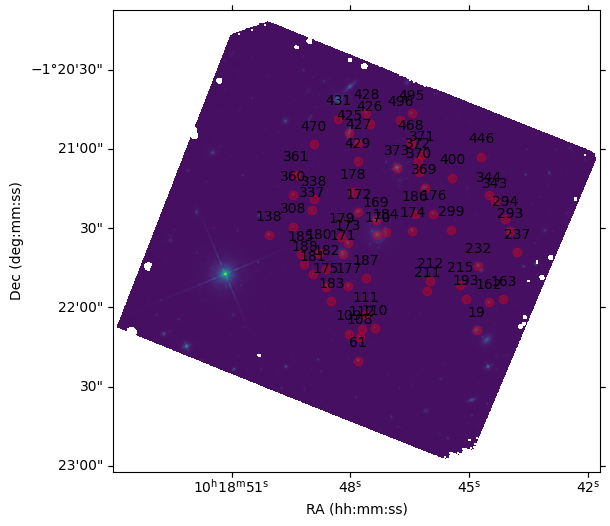

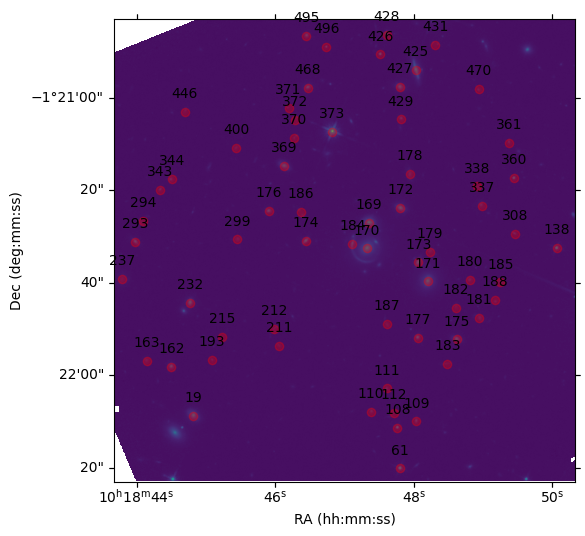

In [9]:
%matplotlib inline

wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

In [10]:
data_legacy.sort_values(by="objid")

# central deflector
central_deflector_id = 170
object_ids = [central_deflector_id, 169, 172, 173, 174]

columns_to_drop = [
    "id",
    "release",
    "brickid",
    "fclean",
    "fqual",
]  # List of column names to drop
data_legacy_dropped = data_legacy.drop(columns=columns_to_drop)

selected_data_legacy = data_legacy_dropped[
    data_legacy_dropped["objid"].isin(object_ids)
]
selected_data_legacy.set_index("objid", inplace=True)

print(selected_data_legacy)

             _r     RAJ2000   DEJ2000 type  pstar gmmcomp  zphot  e_zphot
objid                                                                    
169    0.002221  154.697303 -1.357501  DEV  0.184      D8  0.494    0.120
170    0.001362  154.697190 -1.359045  DEV  0.001      D1  0.400    0.029
172    0.004215  154.699197 -1.356626  REX  0.003      R4  0.414    0.111
173    0.004484  154.700260 -1.359887  REX  0.003      R4  0.402    0.098
174    0.002406  154.693496 -1.358594  REX  0.010      R4  0.370    0.070


In [11]:
zphot_deflector = selected_data_legacy.loc[central_deflector_id, "zphot"]
del_z = 0.03 * (1 + zphot_deflector)
print("zphot_deflector:", zphot_deflector)
print("del_z:", del_z)
data_legacy_cropped_dropped = data_legacy_cropped.drop(columns=columns_to_drop)
data_legacy_cropped_dropped.set_index("objid", inplace=True)
# selected_data_legacy.set_index("objid", inplace=True)

not_neighbour_data_legacy = data_legacy_cropped_dropped[
    (data_legacy_cropped_dropped["zphot"] <= zphot_deflector - del_z)
    | (data_legacy_cropped_dropped["zphot"] >= zphot_deflector + del_z)
]

print(not_neighbour_data_legacy)

zphot_deflector: 0.4
del_z: 0.041999999999999996
             _r     RAJ2000   DEJ2000 type  pstar gmmcomp  zphot  e_zphot
objid                                                                    
61     0.013521  154.699172 -1.372270  PSF  0.999      P4  1.556    2.343
108    0.011119  154.699003 -1.369825  PSF  0.928      P2  0.770    0.196
109    0.011145  154.700153 -1.369442  PSF  0.002      P6  0.455    0.206
110    0.009830  154.697428 -1.368866  PSF  0.013      P6  0.338    0.188
111    0.008676  154.698387 -1.367459  PSF  0.003      P6  0.611    0.163
112    0.010217  154.698807 -1.368942  REX  0.011      R5  1.312    0.587
163    0.013620  154.683926 -1.365786  REX  0.003      R7  0.516    0.241
169    0.002221  154.697303 -1.357501  DEV  0.184      D8  0.494    0.120
179    0.005138  154.700973 -1.359235  REX  0.012      R7  0.356    0.200
180    0.007730  154.703363 -1.360927  PSF  0.002      P6  0.803    0.191
181    0.009045  154.703929 -1.363205  REX  0.002      R1  0.68

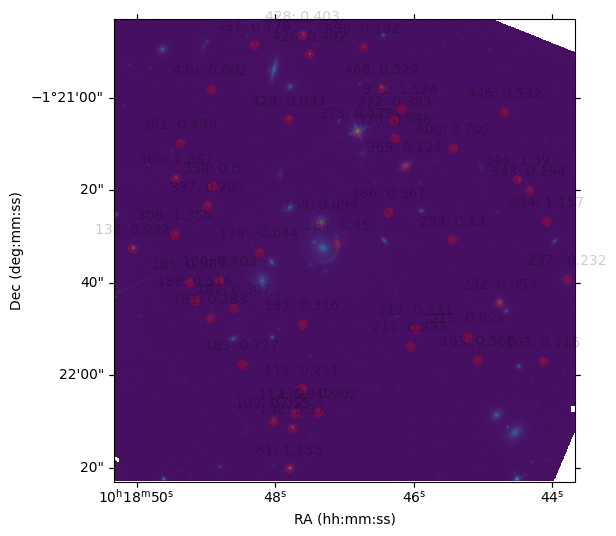

In [12]:
%matplotlib inline
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    not_neighbour_data_legacy["RAJ2000"], not_neighbour_data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.2
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = not_neighbour_data_legacy.index[
        i
    ]  # Accessing the 'objid' column from your DataFrame
    zphot = not_neighbour_data_legacy.iloc[i]["zphot"]
    plt.annotate(
        f"{obj_id}: {round(zphot - zphot_deflector, 3)}",
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha="center",
        alpha=0.2,
    )

ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)

ax.invert_xaxis()
# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

## Save the Redshift data to the YAML file

In [13]:
# Existing YAML file with other parameters
existing_yaml_file = "DESIJ1018-0121_point_estimates.yml"

# Variables to include in the YAML file
z_phot = selected_data_legacy.loc[central_deflector_id, "zphot"]
e_zphot = selected_data_legacy.loc[central_deflector_id, "e_zphot"]

environment_variables = {"z_phot": [z_phot, e_zphot]}

# make all the numpy variales to float
environment_variables = {
    key: [float(item) for item in value] if isinstance(value, list) else float(value)
    for key, value in environment_variables.items()
}

# Load existing YAML content if the file exists
existing_content = {}
try:
    with open(existing_yaml_file, "r") as file:
        existing_content = yaml.safe_load(file)
except FileNotFoundError:
    pass

# Update the existing content with new variables
existing_content.update(environment_variables)

# Write the updated content back to the YAML file
# with open(existing_yaml_file, "w") as file:
#     yaml.dump(existing_content, file, default_flow_style=False)